In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing as prep
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

### Open data files and concatenated them into a single dataframe



In [10]:
# Open the first data file
d1 = pd.read_csv('DailyDelhiClimateTest.csv')
# Open the first data file
d2 = pd.read_csv('DailyDelhiClimateTrain.csv')

# Concatenate the two files
df = pd.concat([d1, d2], axis = 0)

In [11]:
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333


### Check for missing values.  If there are any missing values, deal with them appropriately.

In [12]:
df.isnull().sum()

date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

### Provide written justification explaining why you selected particular methods for dealing with missing values
The dataset does not have any missing values, so there is nothing that needs to be done as far as imputation

### Check for outliers. Do we keep them or do we drop them?  Why? 

<AxesSubplot:>

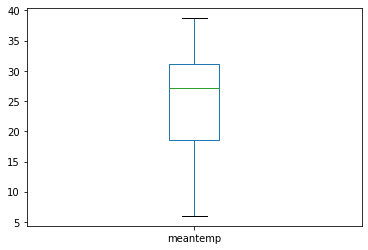

In [13]:
df['meantemp'].plot.box()

Mean temperature column (meantemp) does not seem to have any outliers

<AxesSubplot:>

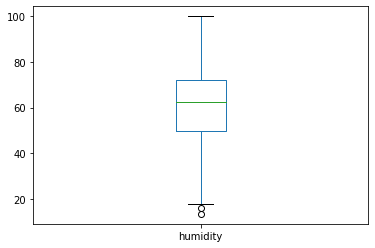

In [14]:
df['humidity'].plot.box()

According to the box plot, there are several outliers in the humidity column. Let's explore if they are legitimate observations or if they are errors.  From the box plot, it seems that the outliers appear on the min side.

In [15]:
df.sort_values('humidity').head(50)

,date,meantemp,humidity,wind_speed,meanpressure
856,2015-05-07,35.428571,13.428571,15.342857,1003.571429
120,2013-05-01,31.857143,15.857143,12.685714,1002.833333
100,2017-04-11,29.250000,17.750000,15.512500,1006.250000
1217,2016-05-02,38.000000,18.466667,9.513333,1002.200000
140,2013-05-21,36.000000,19.000000,11.371429,998.666667
99,2017-04-10,27.857143,19.428571,19.314286,1008.571429
871,2015-05-22,36.250000,19.500000,12.512500,998.125000
876,2015-05-27,33.750000,20.500000,6.712500,1001.250000
525,2014-06-10,37.250000,20.875000,12.037500,994.750000
98,2017-04-09,27.125000,21.125000,14.125000,1010.625000


There are a couple of values in the 13 and 15 range for humidity, but they don't indicate a short drop from the next lowest values of 17, 18, and 19.  Furthermore, after checking the historical weather data from https://www.wunderground.com/ for New Dehli on 2015-05-07 and 2013-05-01, humidity at noon was indeed 13% and 15% respectively, indicating that the observations in the data are valid and should not be discarded

<AxesSubplot:>

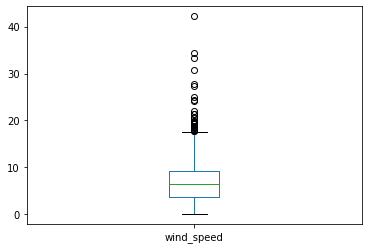

In [16]:
df['wind_speed'].plot.box()

The wind speed (wind_speed) column contains quite a few outliers in the upper range. 

In [17]:
df.sort_values('wind_speed', ascending=False).head(50)

,date,meantemp,humidity,wind_speed,meanpressure
251,2013-09-09,31.000000,57.500000,42.220000,1007.000000
358,2013-12-25,13.666667,63.166667,34.487500,1020.625000
960,2015-08-19,31.250000,61.250000,33.325000,1002.375000
630,2014-09-23,31.000000,47.000000,30.685714,1004.285714
757,2015-01-28,11.714286,67.000000,27.775000,1018.250000
370,2014-01-06,11.428571,86.285714,27.337500,1017.625000
654,2014-10-17,25.000000,47.666667,25.012500,1013.625000
527,2014-06-12,32.875000,39.250000,24.325000,997.000000
59,2013-03-01,17.333333,49.333333,24.066667,1016.333333
1176,2016-03-22,25.062500,37.875000,22.100000,1009.375000


<AxesSubplot:ylabel='Density'>

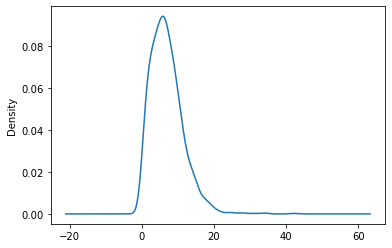

In [18]:
df['wind_speed'].plot.density()

The "outlier" values appear to be a part of the right-skewed distribution.  Upon checking the top five values (values with the highest wind speed) on https://www.wunderground.com/ for New Dehli for corresponding dates, the values appear to be correct and should not be discarded.

<AxesSubplot:>

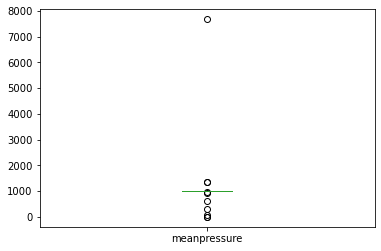

In [19]:
df['meanpressure'].plot.box()

<AxesSubplot:ylabel='Density'>

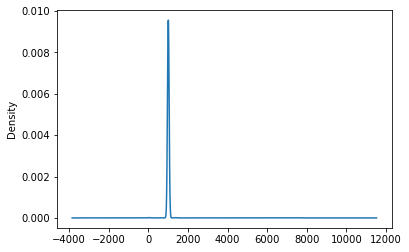

In [20]:
df['meanpressure'].plot.density()

<AxesSubplot:xlabel='date'>

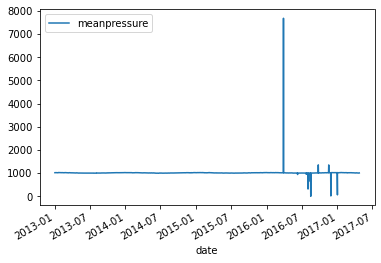

In [21]:
df['date'] = pd.to_datetime(df['date'])
df[['meanpressure','date']].plot.line(x='date',y='meanpressure')

In [22]:
df.sort_values('meanpressure', ascending=False).head(1)

,date,meantemp,humidity,wind_speed,meanpressure
1182,2016-03-28,25.933333,52.8,6.546667,7679.333333


In [23]:
df.sort_values('meanpressure').head(1)

,date,meantemp,humidity,wind_speed,meanpressure
1323,2016-08-16,31.333333,66.416667,14.666667,-3.041667


Upon checking the minimum and maximum mean pressure (values with the highest wind speed) on https://www.wunderground.com/ for New Dehli for corresponding dates, the values appear to be incorrect.  Moreover, it is impossible to have negative atmpospheric pressure.  

In [24]:
df.sort_values('meanpressure', ascending=False).head(10)

,date,meantemp,humidity,wind_speed,meanpressure
1182,2016-03-28,25.933333,52.800000,6.546667,7679.333333
1362,2016-09-24,31.240000,66.480000,5.496154,1352.615385
1416,2016-11-17,21.730769,51.730769,11.550000,1350.296296
383,2014-01-19,14.500000,84.500000,3.475000,1023.000000
18,2017-01-19,14.619048,75.142857,10.338095,1022.809524
717,2014-12-19,11.750000,81.750000,0.462500,1022.125000
1088,2015-12-25,11.500000,66.125000,5.562500,1022.000000
764,2015-02-04,14.625000,81.125000,9.250000,1022.000000
17,2017-01-18,13.041667,78.333333,6.029167,1021.958333
21,2013-01-22,9.500000,79.666667,3.083333,1021.800000


Drop rows with indeces 1182 as the meanpressure value is an erroneous outlier

In [25]:
df.drop([1182], inplace=True)

In [26]:
df.sort_values('meanpressure', ascending=True).head(10)

,date,meantemp,humidity,wind_speed,meanpressure
1323,2016-08-16,31.333333,66.416667,14.666667,-3.041667
1427,2016-11-28,22.454545,37.318182,9.185714,12.045455
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1309,2016-08-02,30.687500,72.125000,6.375000,310.437500
1321,2016-08-14,28.933333,83.700000,6.370000,633.900000
1255,2016-06-09,35.733333,43.733333,9.260000,938.066667
1300,2016-07-24,31.437500,72.250000,2.431250,946.312500
535,2014-06-20,38.000000,36.125000,17.825000,991.375000
523,2014-06-08,37.625000,26.250000,6.725000,993.125000
524,2014-06-09,37.875000,32.125000,6.025000,993.125000


Upon checking historical weather data on  https://www.wunderground.com/, values for indeces 1323, 1427, 0, 1321, and 1309 are erroneous.  We will drop rows with these values.

In [27]:
df.drop([1323, 1427, 0, 1321, 1309], inplace=True)

<AxesSubplot:xlabel='date'>

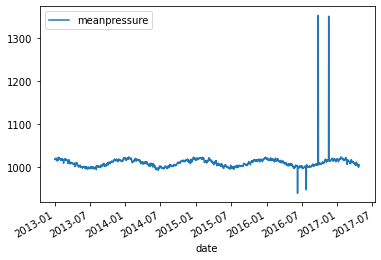

In [28]:
df[['meanpressure','date']].plot.line(x='date',y='meanpressure')

### Scale and transform data as needed

<AxesSubplot:ylabel='Density'>

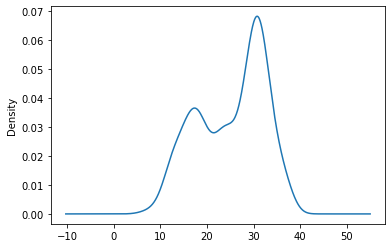

In [29]:
df['meantemp'].plot.density()

There are no large values that would dominate the rest of the data.  There is no need to scale or transform this field

<AxesSubplot:ylabel='Density'>

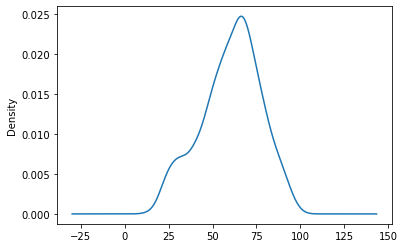

In [30]:
df['humidity'].plot.density()

There are no large values that would dominate the rest of the data, and there is a fairly normal distribution.  There is no need to scale or transform this field

<AxesSubplot:ylabel='Density'>

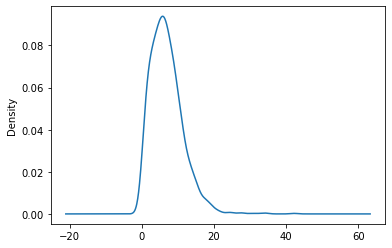

In [31]:
df['wind_speed'].plot.density()

<AxesSubplot:>

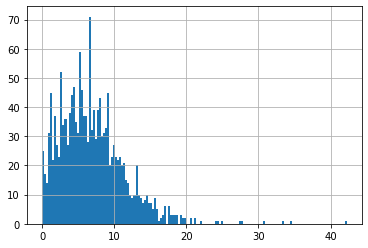

In [48]:
df['wind_speed'].hist(bins=150)

There are no large values that would dominate the rest of the data, but the data is skewed.  Let's attempt a sqrt or log transformation to achieve a more normal distribution

<AxesSubplot:ylabel='Density'>

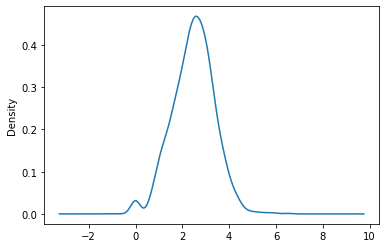

In [49]:
# Square root transformation
df['wind_speed_sqrt'] = df['wind_speed'].apply(lambda x: np.sqrt(x))
df['wind_speed_sqrt'].plot.density()

<AxesSubplot:ylabel='Density'>

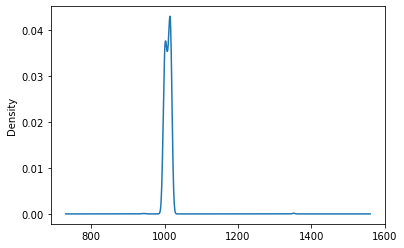

In [50]:
df['meanpressure'].plot.density()

<AxesSubplot:ylabel='Density'>

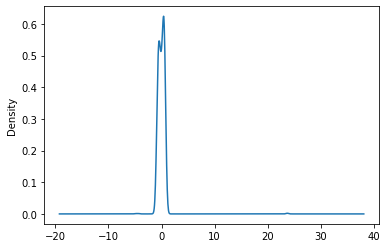

In [51]:
# Scale mean pressure
df['meanpressure_scaled'] = prep.scale(df['meanpressure'])
df['meanpressure_scaled'].plot.density()

<AxesSubplot:ylabel='Density'>

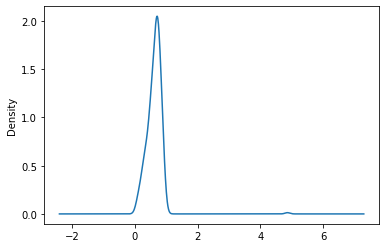

In [35]:
# Transform mean pressure using square root transformation
df['meanpressure_sqrt'] = df['meanpressure_scaled'].apply(lambda x: np.sqrt(x))
df['meanpressure_sqrt'].plot.density()

<AxesSubplot:ylabel='Density'>

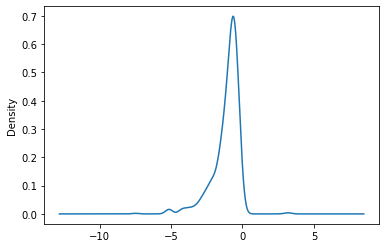

In [36]:
# Transform mean pressure using square root transformation
df['meanpressure_log'] = df['meanpressure_scaled'].apply(lambda x: np.log(x))
df['meanpressure_log'].plot.density()

In [55]:
df.columns

Index(['date', 'meantemp', 'humidity', 'wind_speed', 'meanpressure',
       'wind_speed_sqrt', 'meanpressure_scaled', 'meanpressure_sqrt',
       'meanpressure_log'],
      dtype='object')

<Figure size 432x288 with 0 Axes>

<Figure size 1440x864 with 0 Axes>

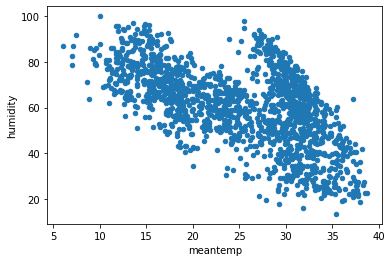

<Figure size 432x288 with 0 Axes>

<Figure size 1440x864 with 0 Axes>

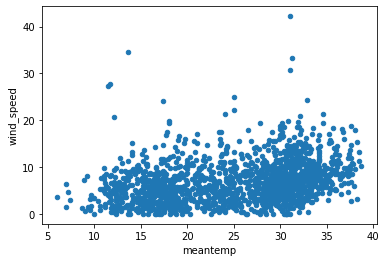

<Figure size 432x288 with 0 Axes>

<Figure size 1440x864 with 0 Axes>

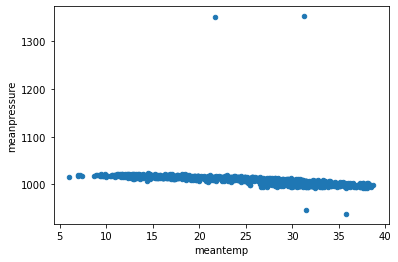

<Figure size 432x288 with 0 Axes>

<Figure size 1440x864 with 0 Axes>

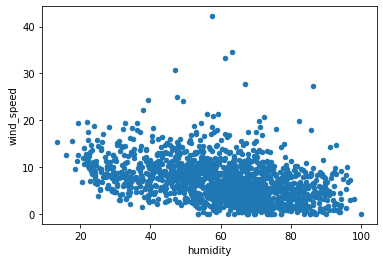

<Figure size 432x288 with 0 Axes>

<Figure size 1440x864 with 0 Axes>

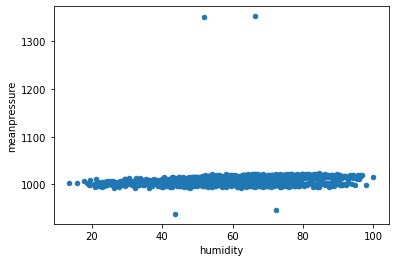

<Figure size 432x288 with 0 Axes>

<Figure size 1440x864 with 0 Axes>

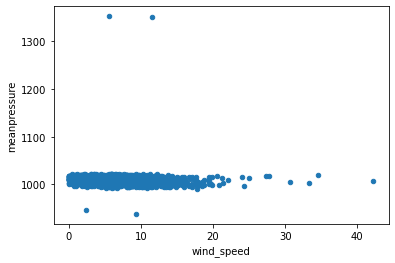

In [70]:
from itertools import combinations
for item in (list(combinations(df[['meantemp', 'humidity', 'wind_speed', 'meanpressure']].columns, 2))):
    plt.figure()
    plt.figure(figsize=(20, 12))
    df.plot.scatter(x=item[0],y=item[1])
    plt.show()

<Figure size 432x288 with 0 Axes>

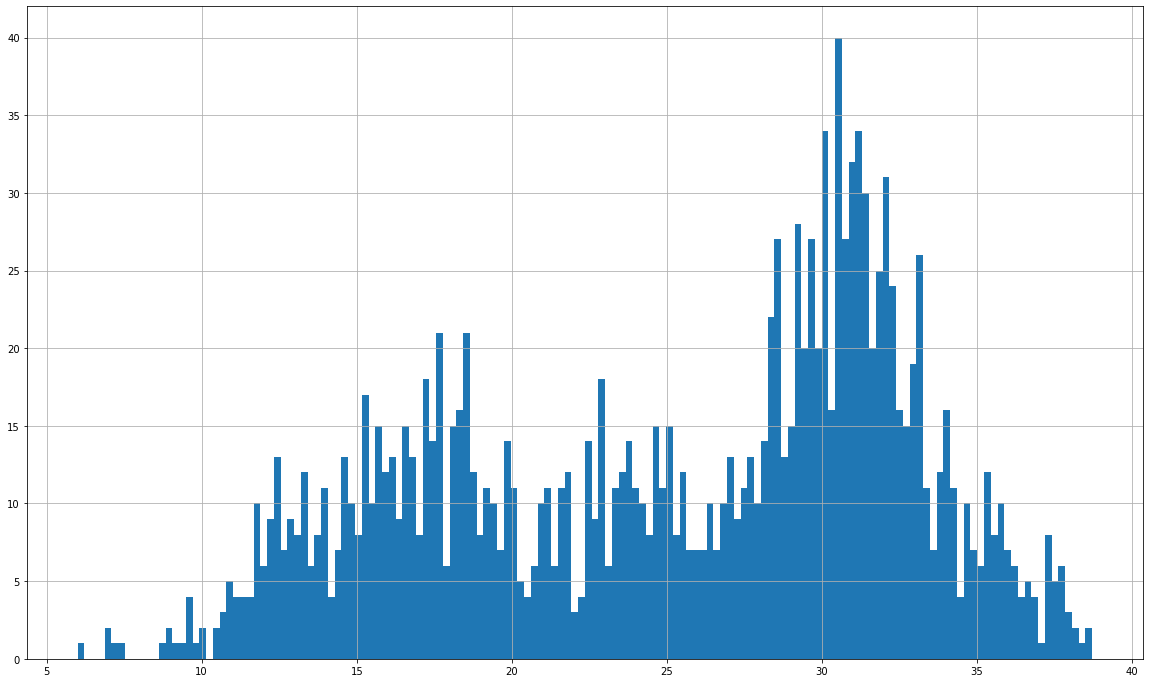

<Figure size 432x288 with 0 Axes>

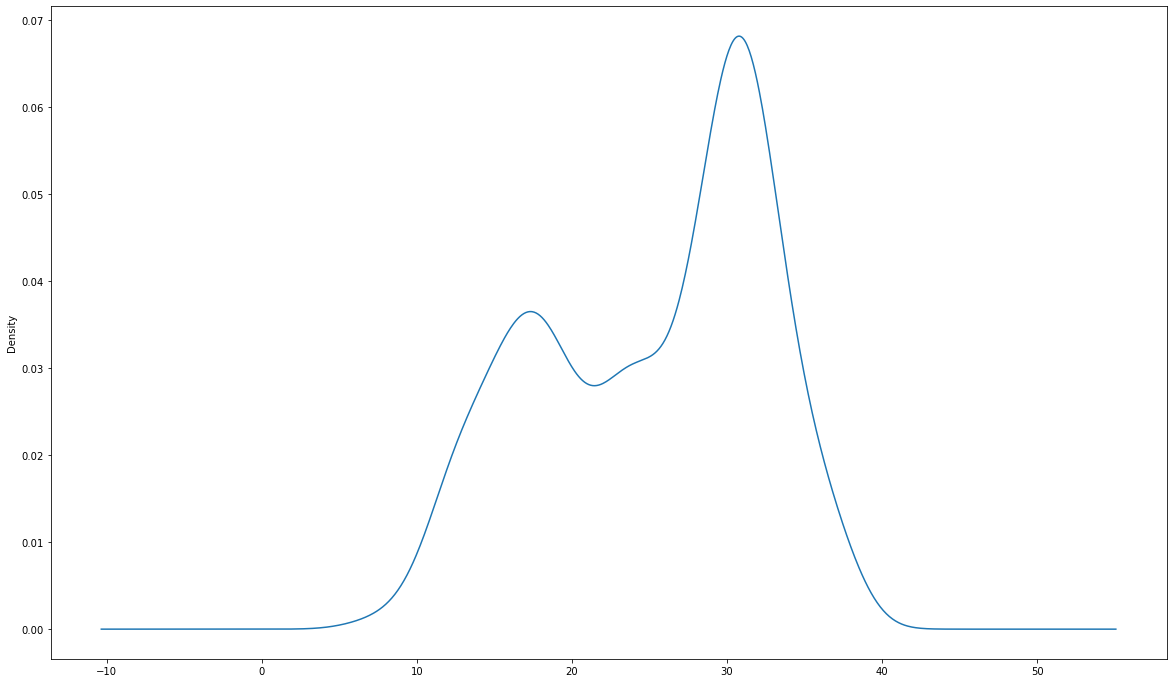

<Figure size 432x288 with 0 Axes>

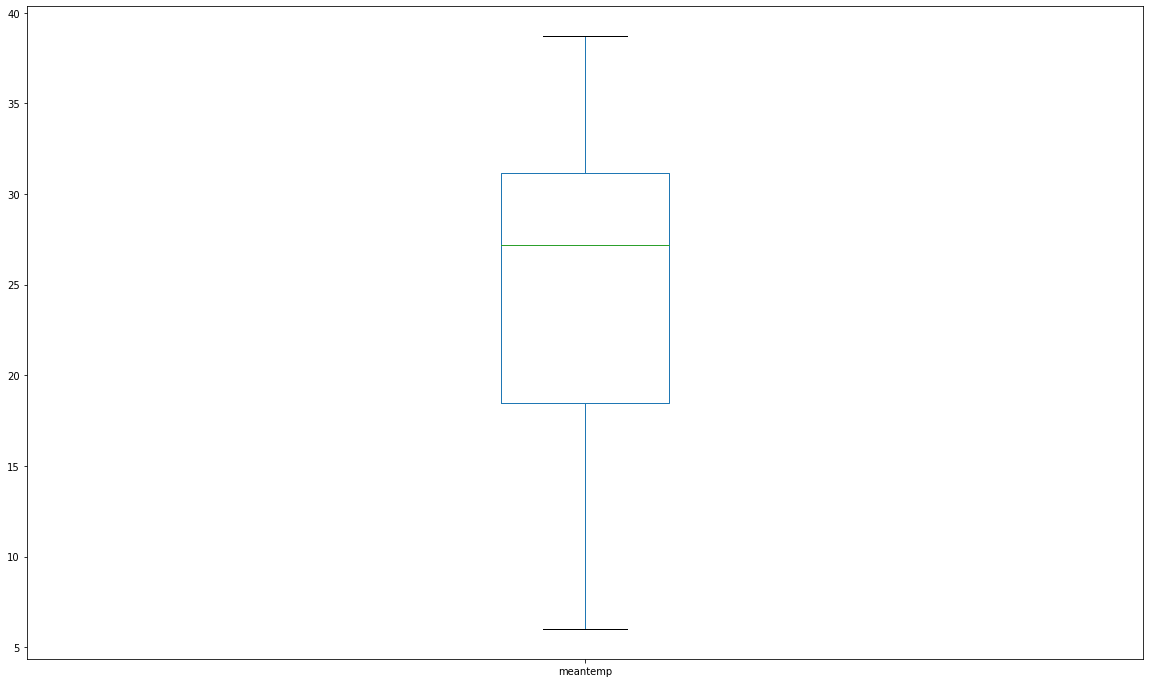

<Figure size 432x288 with 0 Axes>

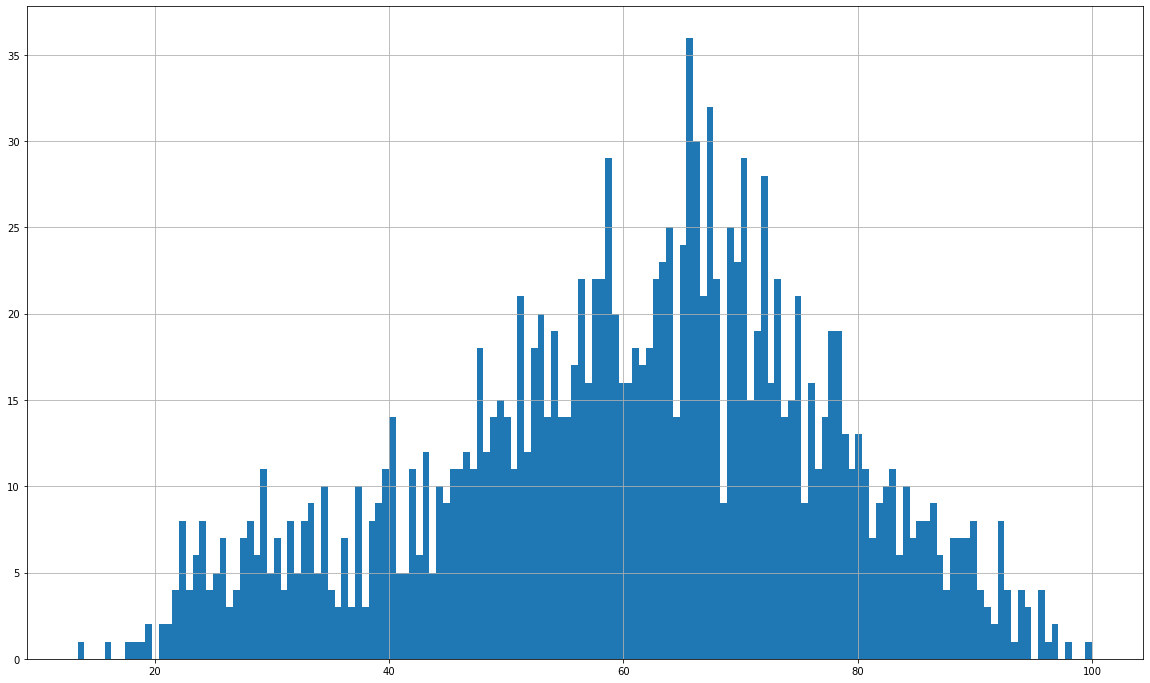

<Figure size 432x288 with 0 Axes>

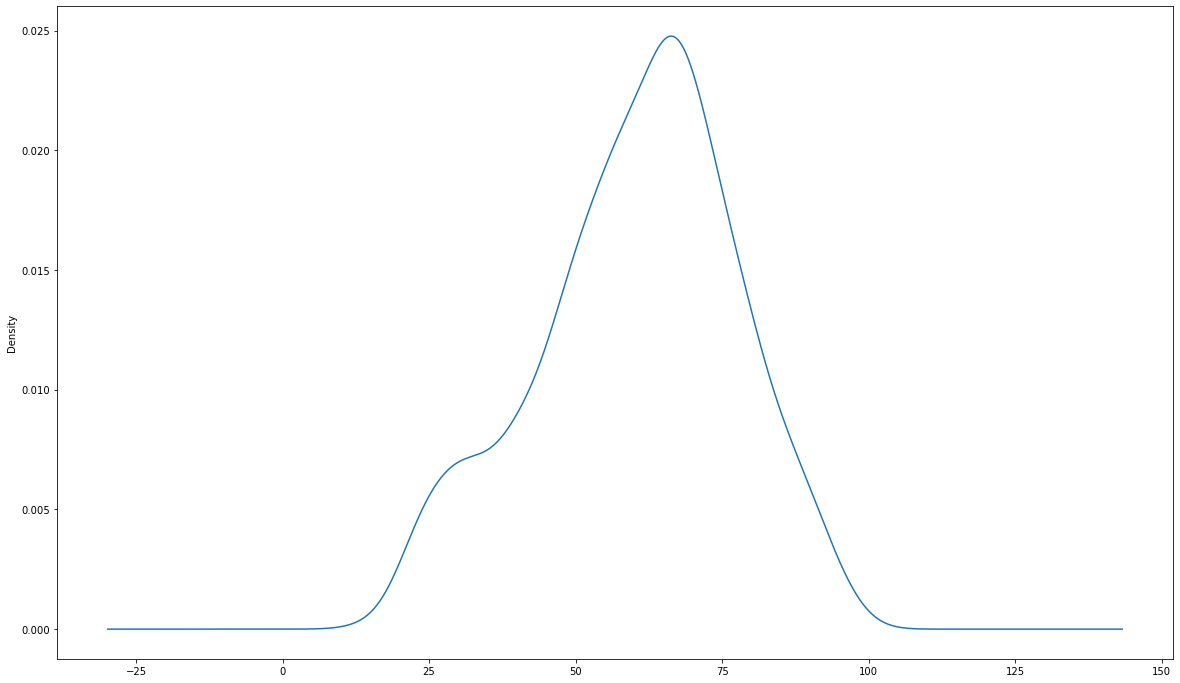

<Figure size 432x288 with 0 Axes>

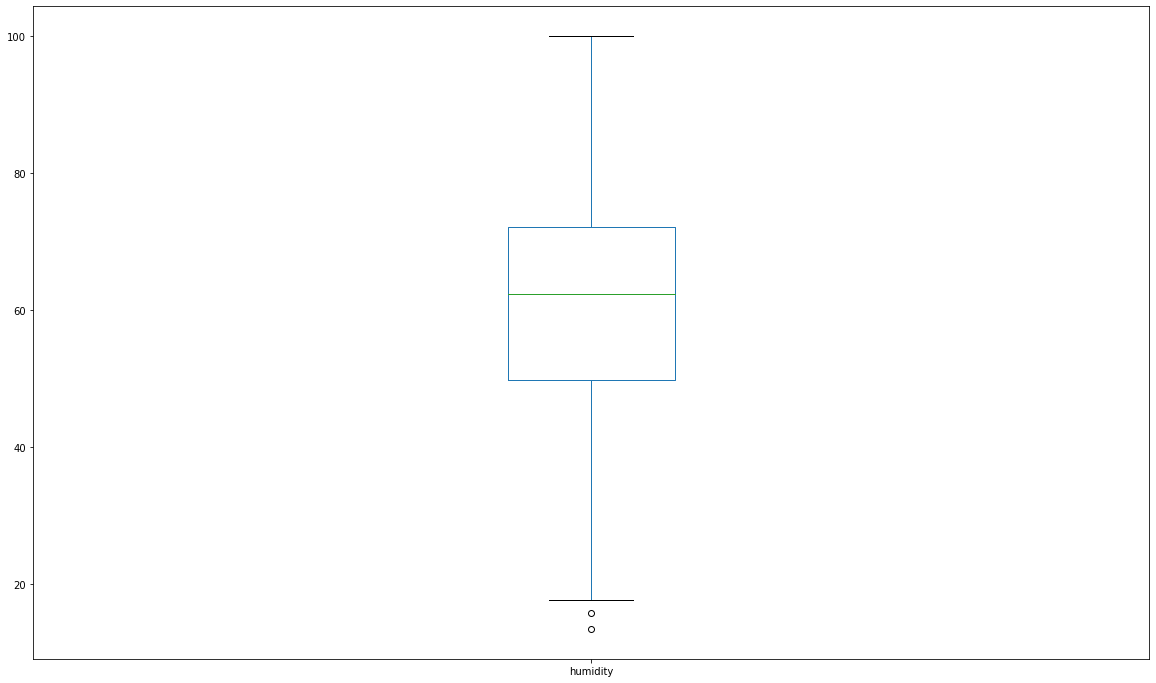

<Figure size 432x288 with 0 Axes>

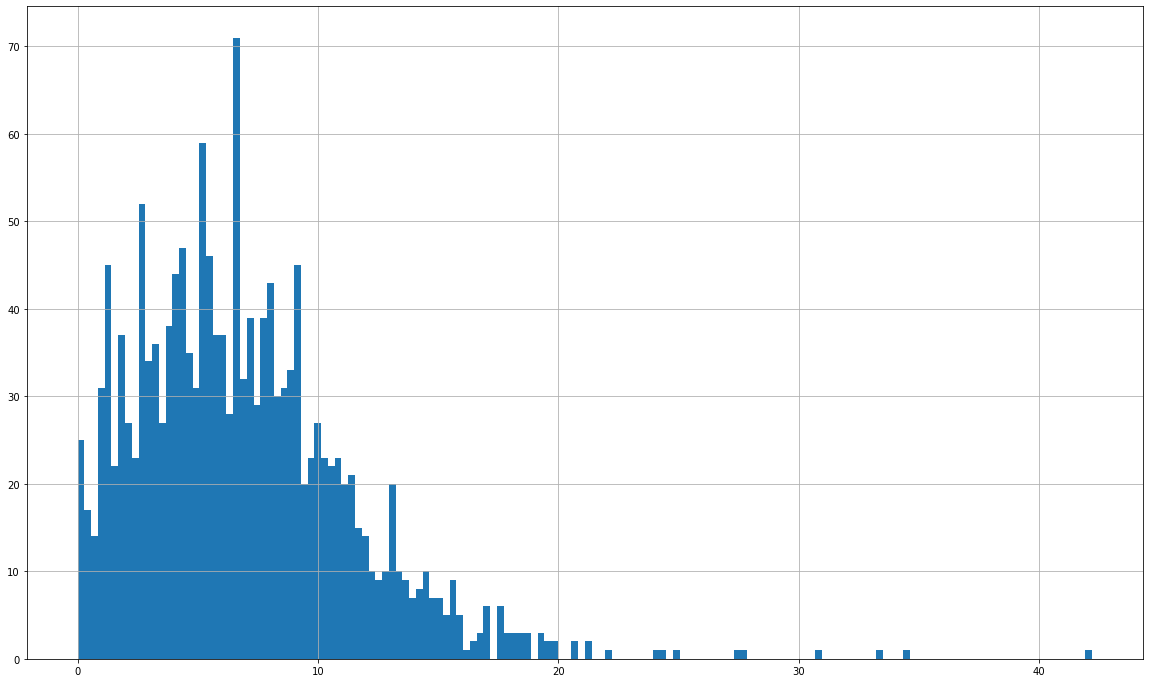

<Figure size 432x288 with 0 Axes>

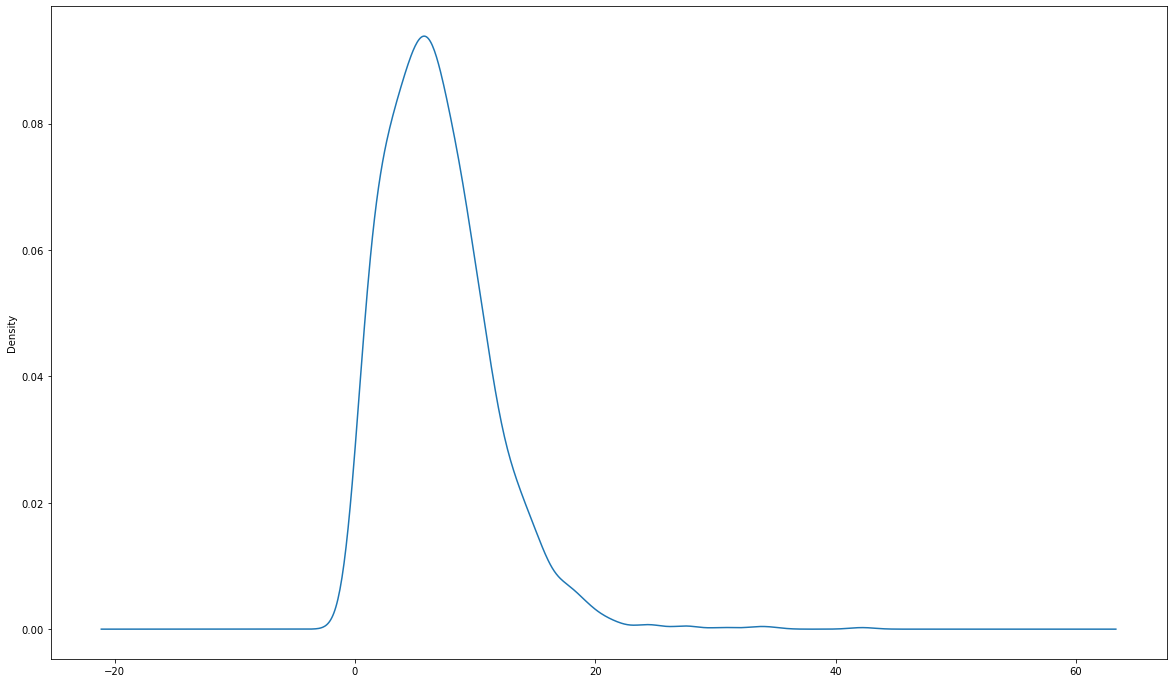

<Figure size 432x288 with 0 Axes>

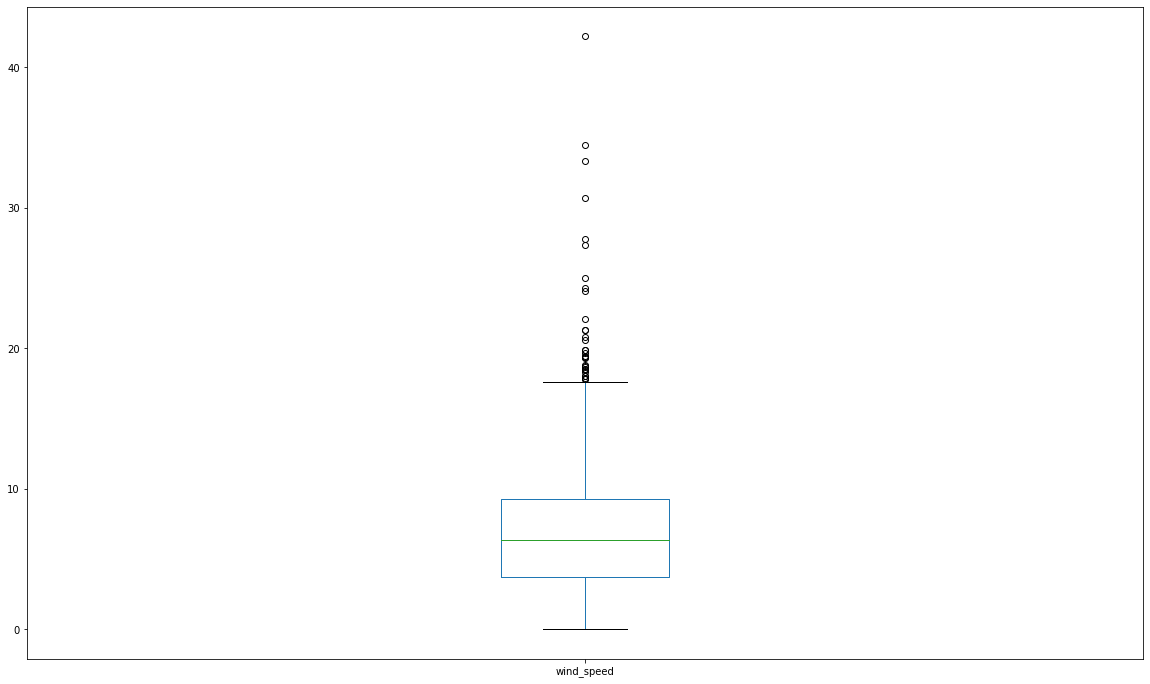

<Figure size 432x288 with 0 Axes>

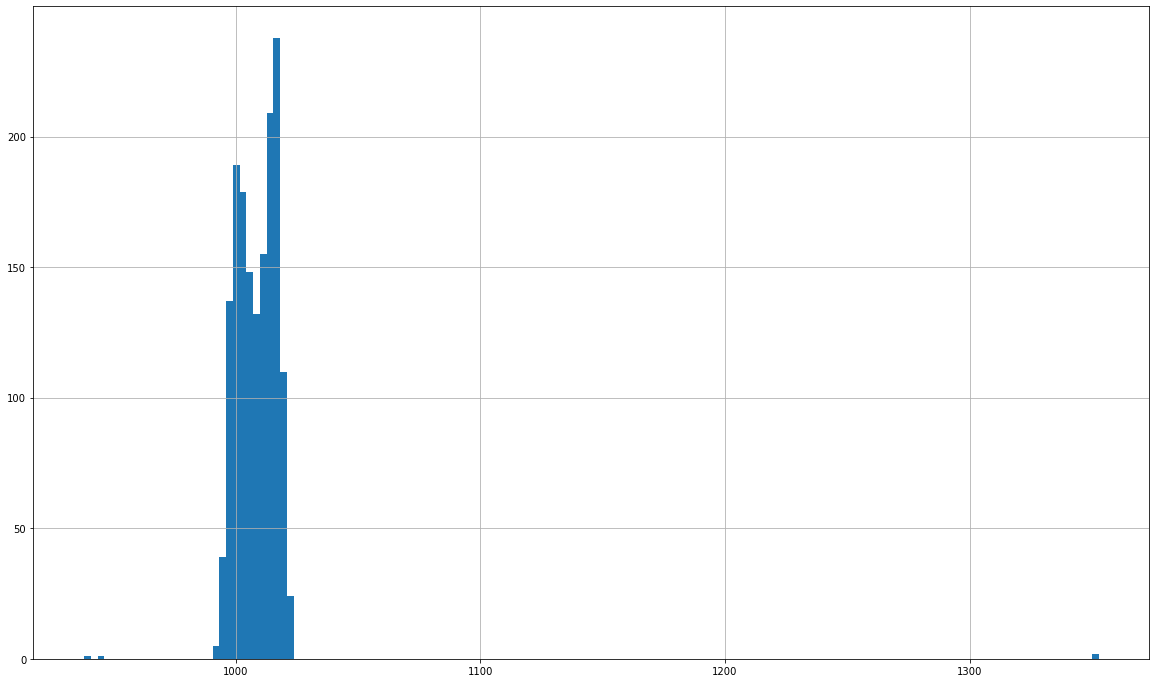

<Figure size 432x288 with 0 Axes>

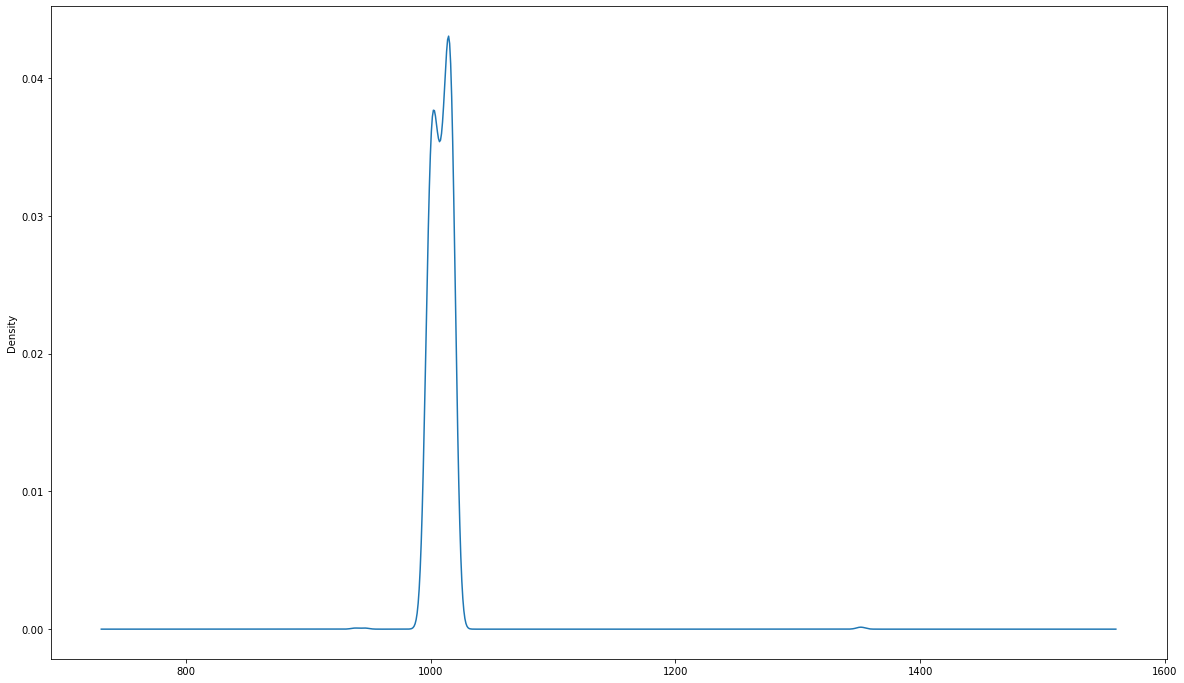

<Figure size 432x288 with 0 Axes>

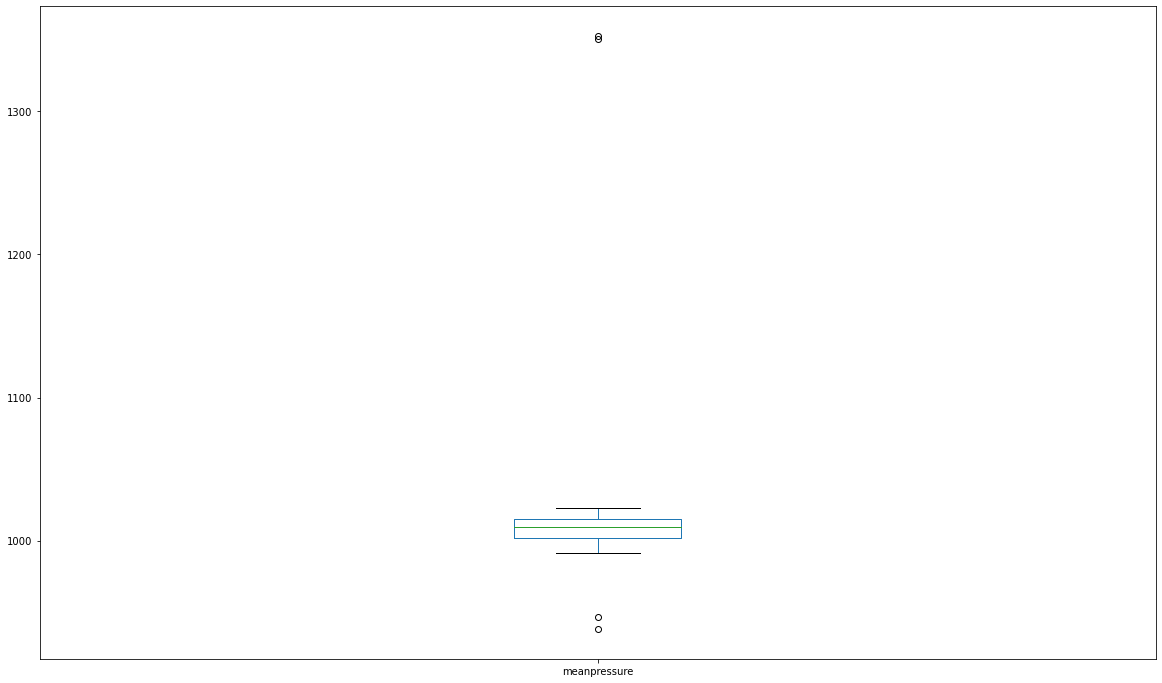

In [59]:
for col in df[['meantemp', 'humidity', 'wind_speed', 'meanpressure']].columns:
    
    plt.figure()
    plt.figure(figsize=(20, 12))
    df[col].hist(bins=150)
    plt.show()
    
    plt.figure()
    plt.figure(figsize=(20, 12))
    df[col].plot.density()
    plt.show()
    
    plt.figure()
    plt.figure(figsize=(20, 12))
    df[col].plot.box()
    plt.show()

### Define features

In [60]:
X = df[['humidity','wind_speed','meanpressure']]
y = df[['meantemp']]

### Split Data

In [61]:
# Now we can split our data into a training and test set.  In this example, we are using an 80/20 split, 
# where 80% of our data will be used for training our model, and 20% of our data will be used for testing.

# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

### Train Model

In [62]:
# Now we train our LinearRegression model using the training subset of data.
model = LinearRegression()
model.fit(X_train, y_train)

import pickle
with open('hw3_model.pkl', 'wb') as file:
    pickle.dump(model, file)

LinearRegression()

### Evaluate the model

In [63]:
r = model.score(X_test, y_test)

y_predict = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_predict, y_test))

print("R-sqare: ", r)
print("RMSE: ", rmse)

R-sqare:  -6.204526372243856
RMSE:  19.333143348007564


### Try different sets of predictors


In [41]:
# With humidity and mean pressure
X = df[['humidity','meanpressure']]
y = df[['meantemp']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
model = LinearRegression()
model.fit(X_train, y_train)
r = model.score(X_test, y_test)

y_predict = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_predict, y_test))

print("R-sqare: ", r)
print("RMSE: ", rmse)

R-sqare:  -6.110766948581319
RMSE:  19.20693098792043


In [42]:
# With wind_speed and mean pressure
X = df[['humidity','wind_speed']]
y = df[['meantemp']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
model = LinearRegression()
model.fit(X_train, y_train)
r = model.score(X_test, y_test)

y_predict = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_predict, y_test))

print("R-sqare: ", r)
print("RMSE: ", rmse)

R-sqare:  0.3586083078603439
RMSE:  5.768480362393904


### Try polynomial regression

In [43]:
X = df[['humidity','wind_speed','meanpressure']]
y = df[['meantemp']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

for i in range(2, 10):
    polynomial_features= PolynomialFeatures(degree=i)
    X_train_poly = polynomial_features.fit_transform(X_train)
    X_test_poly = polynomial_features.fit_transform(X_test)
    print("Polynomial Degree: ", i)
    plm = LinearRegression()
    plm.fit(X_train_poly, y_train)
    y_poly_pred = plm.predict(X_test_poly)
    r2 = r2_score(y_test,y_poly_pred)
    print("R-Squared: ", r2)

    regression_model_mse = mean_squared_error(y_poly_pred, y_test)
    rmse = np.sqrt(regression_model_mse)
    print("RMSE: ", rmse)

Polynomial Degree:  2
R-Squared:  -307.27262659884695
RMSE:  126.4640933355336
Polynomial Degree:  3
R-Squared:  -7527.462995402267
RMSE:  624.9609955007444
Polynomial Degree:  4
R-Squared:  -10796.955407371548
RMSE:  748.4633139336164
Polynomial Degree:  5
R-Squared:  -45113.28367819957
RMSE:  1529.8779541221065
Polynomial Degree:  6
R-Squared:  -86095946.7652465
RMSE:  66833.02351423139
Polynomial Degree:  7
R-Squared:  -164557742.0912
RMSE:  92397.22212100074
Polynomial Degree:  8
R-Squared:  -278590350.5927546
RMSE:  120221.67903223122
Polynomial Degree:  9
R-Squared:  -421806285.1927803
RMSE:  147930.00681051987
